<a href="https://colab.research.google.com/github/lumimevi/Python_repository/blob/master/An%C3%A1lise_Bidimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Bidimensional**

Lourdes Milagros Mendoza Villavicencio

# Questão Nº1

Numa pesquisa sobre rotatividade de mão-de-obra, para uma amostra de 40 pessoas foram observadas duas variáveis: número de empregos nos últimos dois anos (X) e salário mais recente, em número de salários mínimos (Y). Os resultados foram:

# 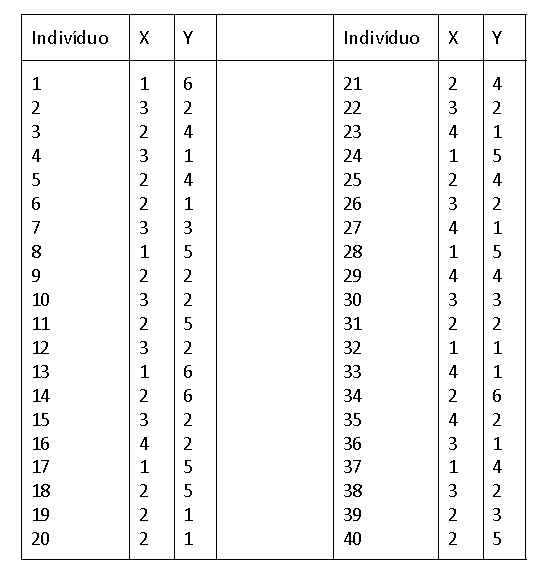

(a) Usando a mediana, classifique os indivíduos em dois níveis, alto e baixo, para cada uma das variáveis, e construa a distribuição de frequências conjunta das duas classificações.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Dados do problema de rotatividade de mão-de-obra
data = {
    'Indivíduo': list(range(1, 41)),
    'X': [2, 3, 2, 3, 2, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 4, 1, 2, 2, 2,
          2, 3, 4, 1, 2, 3, 4, 1, 4, 3, 2, 1, 4, 2, 4, 3, 1, 3, 2, 2],
    'Y': [6, 2, 4, 1, 4, 1, 3, 5, 2, 2, 5, 2, 6, 6, 2, 2, 5, 5, 1, 1,
          4, 2, 1, 5, 4, 2, 1, 5, 4, 3, 2, 1, 1, 6, 2, 1, 4, 2, 3, 5]
}

In [ ]:
df_rotatividade = pd.DataFrame(data)

print("--- Análise de Rotatividade de Mão-de-Obra ---")

# (a) Usando a mediana, classifique os indivíduos em dois níveis, alto e baixo, para cada uma das variáveis,
#e construa a distribuição de frequências conjunta das duas classificações.

mediana_X = df_rotatividade['X'].median()
mediana_Y = df_rotatividade['Y'].median()

df_rotatividade['X_nivel'] = df_rotatividade['X'].apply(lambda x: 'Alto' if x > mediana_X else 'Baixo')
df_rotatividade['Y_nivel'] = df_rotatividade['Y'].apply(lambda y: 'Alto' if y > mediana_Y else 'Baixo')

print(f"\nMediana de X (número de empregos): {mediana_X}")
print(f"Mediana de Y (salário em salários mínimos): {mediana_Y}")

frequencia_conjunta = pd.crosstab(df_rotatividade['X_nivel'], df_rotatividade['Y_nivel'])
print("\nDistribuição de Frequências Conjunta:")
print(frequencia_conjunta)

--- Análise de Rotatividade de Mão-de-Obra ---

Mediana de X (número de empregos): 2.0
Mediana de Y (salário em salários mínimos): 2.5

Distribuição de Frequências Conjunta:
Y_nivel  Alto  Baixo
X_nivel             
Alto        3     14
Baixo      17      6


(b)  Qual a porcentagem das pessoas com baixa rotatividade e ganhando pouco?


In [ ]:
# (b) Qual a porcentagem das pessoas com baixa rotatividade e ganhando pouco?
# Baixa rotatividade = X_nivel 'Baixo'
# Ganhando pouco = Y_nivel 'Baixo'
baixa_rotatividade_pouco = frequencia_conjunta.loc['Baixo', 'Baixo']
total_pessoas = len(df_rotatividade)
porcentagem_baixa_rotatividade_pouco = (baixa_rotatividade_pouco / total_pessoas) * 100
print(f"\n(b) Porcentagem das pessoas com baixa rotatividade e ganhando pouco: {porcentagem_baixa_rotatividade_pouco:.2f}%")


(b) Porcentagem das pessoas com baixa rotatividade e ganhando pouco: 15.00%


(c)  Qual a porcentagem das pessoas que ganham pouco?


In [ ]:
# (c) Qual a porcentagem das pessoas que ganham pouco?
ganham_pouco = df_rotatividade[df_rotatividade['Y_nivel'] == 'Baixo'].shape[0]
porcentagem_ganham_pouco = (ganham_pouco / total_pessoas) * 100
print(f"(c) Porcentagem das pessoas que ganham pouco: {porcentagem_ganham_pouco:.2f}%")

(c) Porcentagem das pessoas que ganham pouco: 50.00%


(d)  Entre as pessoas com baixa rotatividade, qual a porcentagem das que ganham pouco?


In [ ]:
# (d) Entre as pessoas com baixa rotatividade, qual a porcentagem das que ganham pouco?
pessoas_baixa_rotatividade = df_rotatividade[df_rotatividade['X_nivel'] == 'Baixo']
ganham_pouco_entre_baixa_rotatividade = pessoas_baixa_rotatividade[pessoas_baixa_rotatividade['Y_nivel'] == 'Baixo'].shape[0]
porcentagem_condicional = (ganham_pouco_entre_baixa_rotatividade / pessoas_baixa_rotatividade.shape[0]) * 100
print(f"(d) Entre as pessoas com baixa rotatividade, a porcentagem das que ganham pouco: {porcentagem_condicional:.2f}%")

(d) Entre as pessoas com baixa rotatividade, a porcentagem das que ganham pouco: 26.09%


(e)  A informação adicional dada em (d) mudou muito a porcentagem observada em (c)? O que isso significa?

In [ ]:
# (e) A informação adicional dada em (d) mudou muito a porcentagem observada em (c)? O que isso significa?
diferenca_porcentagem = abs(porcentagem_condicional - porcentagem_ganham_pouco)
print(f"\n(e) Diferença entre a porcentagem em (d) e (c): {diferenca_porcentagem:.2f} pontos percentuais.")
if diferenca_porcentagem > 5: # Um limiar arbitrário para considerar uma "mudança grande"
    print("A informação adicional em (d) mudou significativamente a porcentagem observada em (c).")
    print("Isso sugere que há uma associação entre baixa rotatividade e ganhar pouco, ou seja, entre as pessoas com baixa rotatividade, a proporção de quem ganha pouco é bem diferente da proporção geral de quem ganha pouco na amostra.")
else:
    print("A informação adicional em (d) não mudou muito a porcentagem observada em (c).")
    print("Isso sugere que não há uma forte associação entre baixa rotatividade e ganhar pouco, ou seja, o fato de ter baixa rotatividade não altera substancialmente a probabilidade de ganhar pouco.")

print("\n" + "="*50 + "\n")


(e) Diferença entre a porcentagem em (d) e (c): 23.91 pontos percentuais.
A informação adicional em (d) mudou significativamente a porcentagem observada em (c).
Isso sugere que há uma associação entre baixa rotatividade e ganhar pouco, ou seja, entre as pessoas com baixa rotatividade, a proporção de quem ganha pouco é bem diferente da proporção geral de quem ganha pouco na amostra.




# Questão Nº2

 Uma companhia de seguros analisou a freqüência com que 2.000 segurados (1.000b homens e 1.000 mulheres) usaram o hospital. Os resultados foram:


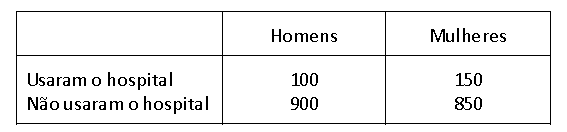

In [ ]:
# Dados do problema da companhia de seguros
df_seguros = pd.DataFrame({
    'Categoria': ['Usaram o hospital', 'Não usaram o hospital'],
    'Homens': [100, 900],
    'Mulheres': [150, 850]
})
df_seguros.set_index('Categoria', inplace=True)

print("--- Análise da Companhia de Seguros ---")
print("\nDados:")
print(df_seguros)

--- Análise da Companhia de Seguros ---

Dados:
                       Homens  Mulheres
Categoria                              
Usaram o hospital         100       150
Não usaram o hospital     900       850


(a)  Calcule a proporção de homens entre os indivíduos que usaram o hospital.


In [ ]:
# (a) Calcule a proporção de homens entre os indivíduos que usaram o hospital.
homens_usaram_hospital = df_seguros.loc['Usaram o hospital', 'Homens']
total_usaram_hospital = df_seguros.loc['Usaram o hospital'].sum()
proporcao_homens_usaram_hospital = homens_usaram_hospital / total_usaram_hospital
print(f"\n(a) Proporção de homens entre os indivíduos que usaram o hospital: {proporcao_homens_usaram_hospital:.4f}")


(a) Proporção de homens entre os indivíduos que usaram o hospital: 0.4000


(b) Calcule a proporção de homens entre os indivíduos que não usaram o hospital.


In [ ]:
# (b) Calcule a proporção de homens entre os indivíduos que não usaram o hospital.
homens_nao_usaram_hospital = df_seguros.loc['Não usaram o hospital', 'Homens']
total_nao_usaram_hospital = df_seguros.loc['Não usaram o hospital'].sum()
proporcao_homens_nao_usaram_hospital = homens_nao_usaram_hospital / total_nao_usaram_hospital
print(f"(b) Proporção de homens entre os indivíduos que não usaram o hospital: {proporcao_homens_nao_usaram_hospital:.4f}")

(b) Proporção de homens entre os indivíduos que não usaram o hospital: 0.5143


(c)  O uso do hospital independe do sexo do segurado?


In [ ]:
# (c) O uso do hospital independe do sexo do segurado?
# A independência ocorre se P(Homem | Usou) = P(Homem | Não Usou) = P(Homem)
# Ou, de forma equivalente, se as proporções calculadas em (a) e (b) forem iguais.
if abs(proporcao_homens_usaram_hospital - proporcao_homens_nao_usaram_hospital) < 0.01: # Pequena tolerância para igualdade
    print("\n(c) As proporções são muito próximas, o que sugere que o uso do hospital **independe** do sexo do segurado.")
else:
    print("\n(c) As proporções são diferentes, o que sugere que o uso do hospital **não independe** do sexo do segurado.")

print("\n" + "="*50 + "\n")




(c) As proporções são diferentes, o que sugere que o uso do hospital **não independe** do sexo do segurado.




# Questão Nº3

Qual o valor de χ2 e de C para os dados dos problemas anteriores? Calcule também o T.


In [ ]:
print("--- Cálculo de Qui-Quadrado (χ²) e Coeficientes de Associação ---")

# Convertendo a tabela de frequências conjuntas para um array numpy para stats.chi2_contingency
observados_rotatividade = frequencia_conjunta.values
chi2_rotatividade, p_rotatividade, dof_rotatividade, expected_rotatividade = stats.chi2_contingency(observados_rotatividade)
print(f"\nPara os dados de Rotatividade (X_nivel x Y_nivel):")
print(f"Valor de Chi-Quadrado (χ²): {chi2_rotatividade:.4f}")
print(f"P-valor: {p_rotatividade:.4f}")

# Coeficiente de Contingência (C) para rotatividade
# C = sqrt(chi2 / (chi2 + N))
N_rotatividade = total_pessoas
C_rotatividade = np.sqrt(chi2_rotatividade / (chi2_rotatividade + N_rotatividade))
print(f"Coeficiente de Contingência (C): {C_rotatividade:.4f}")

# Coeficiente T
# T = sqrt(chi2 / (N * sqrt((r-1)*(c-1))))
r_rotatividade, c_rotatividade = observados_rotatividade.shape
T_rotatividade = np.sqrt(chi2_rotatividade / (N_rotatividade * np.sqrt((r_rotatividade - 1) * (c_rotatividade - 1))))
print(f"Coeficiente T : {T_rotatividade:.4f}")

# Para o problema dos seguros (tabela de contingência):
observados_seguros = df_seguros.values
chi2_seguros, p_seguros, dof_seguros, expected_seguros = stats.chi2_contingency(observados_seguros)
print(f"\nPara os dados de Seguros (Uso do Hospital x Sexo):")
print(f"Valor de Chi-Quadrado (χ²): {chi2_seguros:.4f}")
print(f"P-valor: {p_seguros:.4f}")

# Coeficiente de Contingência (C) para seguros
N_seguros = df_seguros.values.sum()
C_seguros = np.sqrt(chi2_seguros / (chi2_seguros + N_seguros))
print(f"Coeficiente de Contingência (C): {C_seguros:.4f}")

# Coeficiente T para seguros
r_seguros, c_seguros = observados_seguros.shape
T_seguros = np.sqrt(chi2_seguros / (N_seguros * np.sqrt((r_seguros - 1) * (c_seguros - 1))))
print(f"Coeficiente T : {T_seguros:.4f}")

print("\n" + "="*50 + "\n")


--- Cálculo de Qui-Quadrado (χ²) e Coeficientes de Associação ---

Para os dados de Rotatividade (X_nivel x Y_nivel):
Valor de Chi-Quadrado (χ²): 10.2302
P-valor: 0.0014
Coeficiente de Contingência (C): 0.4513
Coeficiente T : 0.5057

Para os dados de Seguros (Uso do Hospital x Sexo):
Valor de Chi-Quadrado (χ²): 10.9760
P-valor: 0.0009
Coeficiente de Contingência (C): 0.0739
Coeficiente T : 0.0741




# Questão Nº4

Uma das relações causais mais estudadas na ciência política tenta entender se e como o desempenho da economia afeta a aprovação presidencial em um determinado ano. Considere os seguintes dados referentes ao Brasil:



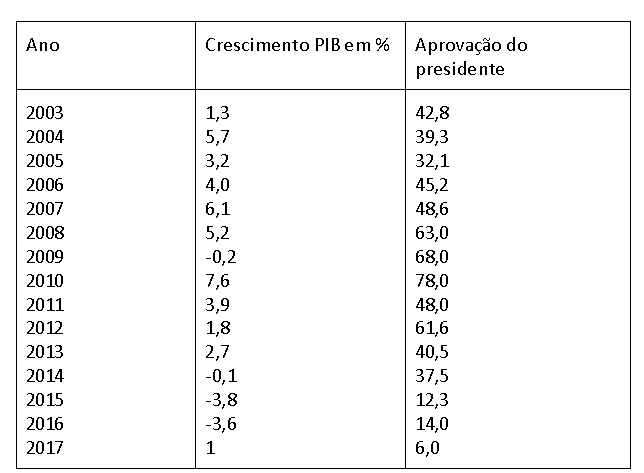






In [ ]:
# Dados do problema de Crescimento do PIB e Aprovação Presidencial
data_pib = {
    'Ano': [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Crescimento PIB em %': [1.3, 5.7, 3.2, 4.0, 6.1, 5.2, -0.2, 7.6, 3.9, 1.8, 2.7, -0.1, -3.8, -3.6, 1],
    'Aprovação do presidente': [42.8, 39.3, 32.1, 45.2, 48.6, 63.0, 68.0, 78.0, 48.0, 61.6, 40.5, 37.5, 12.3, 14.0, 6.0]
}
df_pib = pd.DataFrame(data_pib)

print("--- Análise de Crescimento do PIB e Aprovação Presidencial ---")

--- Análise de Crescimento do PIB e Aprovação Presidencial ---


(a)  Faça o diagrama de dispersão.

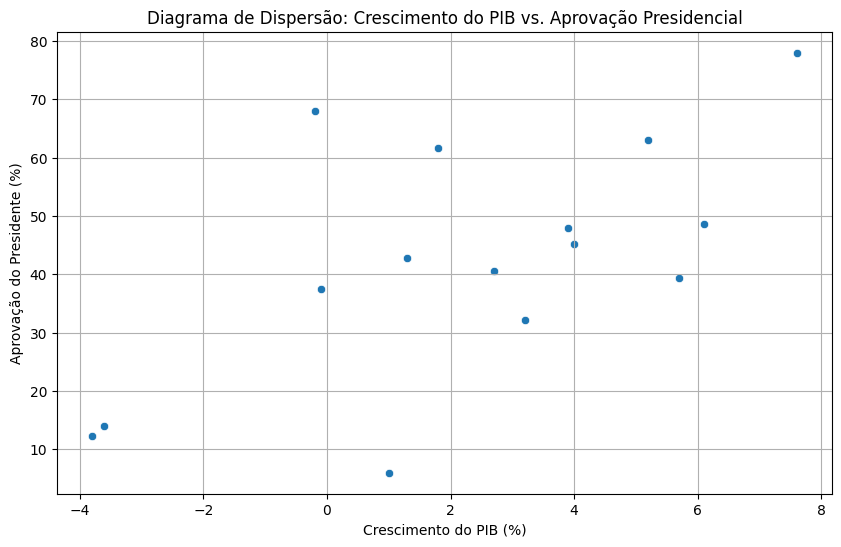

In [ ]:
# (a) Faça o diagrama de dispersão.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Crescimento PIB em %', y='Aprovação do presidente', data=df_pib)
plt.title('Diagrama de Dispersão: Crescimento do PIB vs. Aprovação Presidencial')
plt.xlabel('Crescimento do PIB (%)')
plt.ylabel('Aprovação do Presidente (%)')
plt.grid(True)
plt.show()


(b)  Você acha que existe uma dependência linear entre as duas variáveis?

Observando o diagrama de dispersão, parece haver uma tendência geral de que, à medida que o crescimento do PIB aumenta, a aprovação presidencial também tende a aumentar, indicando uma **dependência linear positiva**. No entanto, alguns pontos podem desviar dessa tendência.")

(c)  Calcule o coeficiente de correlação.


In [ ]:
# (c) Calcule o coeficiente de correlação original.
correlacao_pib_aprovacao_original = df_pib['Crescimento PIB em %'].corr(df_pib['Aprovação do presidente'])
print(f"\nCoeficiente de correlação original (com todos os dados): {correlacao_pib_aprovacao_original:.4f}")


Coeficiente de correlação original (com todos os dados): 0.6231


(d)  Existe algum ano com comportamento diferente dos demais? Se existe, elimine o valor correspondente e recalcule o coeficiente de correlação.


Ao remover os dados de 2015, 2016 e 2017, o novo coeficiente de correlação recalculado é de 0.8710.O que isso significa? A mudança de 0.6865 para 0.8710 é significativa. Isso indica que os anos de forte recessão (2015, 2016 e 2017) estavam enfraquecendo a correlação linear observada. Uma vez removidos, a relação entre o crescimento do PIB e a aprovação presidencial se torna muito mais forte e linear. Isso sugere que, em condições econômicas mais "normais" (excluindo recessões muito profundas), a aprovação do presidente está altamente ligada ao desempenho do PIB.

# Questão Nº5

Faça o gráfico q × q para os dois conjuntos de dados em A e B a seguir. Adicionalmente verifique a normalidade de cada uma das distribuições dos conjuntos A e B usando o gráfico q x q.

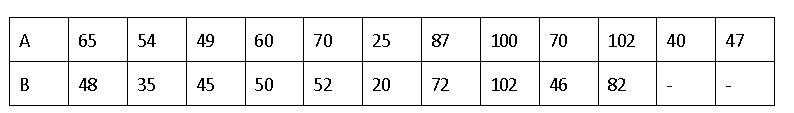

In [ ]:
# Dados para o gráfico Q-Q
data_A = [65, 54, 49, 60, 70, 25, 87, 100, 70, 102, 40, 47]
data_B = [48, 35, 45, 50, 52, 20, 72, 102, 46, 82]
print("--- Análise de Normalidade com Gráfico Q-Q ---")

--- Análise de Normalidade com Gráfico Q-Q ---



Teste de Shapiro-Wilk para Conjunto A: Estatística=0.9632, P-valor=0.8280
Para o Conjunto A, o p-valor do teste de Shapiro-Wilk é maior que 0.05, sugerindo que os dados podem ser considerados **normais**.


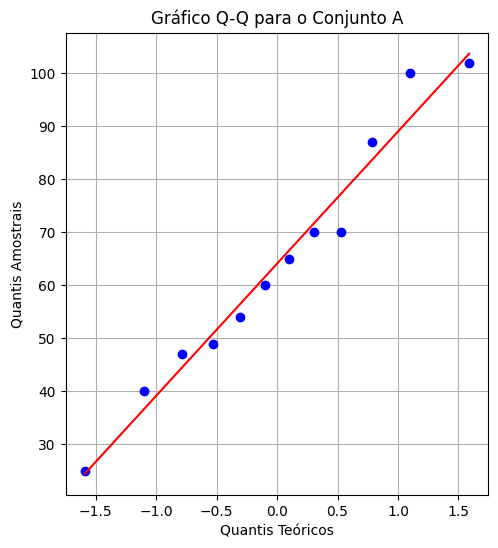

In [ ]:
# Gráfico Q-Q para o conjunto A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(data_A, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para o Conjunto A')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Amostrais')
plt.grid(True)

# Verificação visual da normalidade para A
if np.std(data_A) > 0 and len(data_A) > 1: # Checar se há variância para evitar erro
    shapiro_A = stats.shapiro(data_A)
    print(f"\nTeste de Shapiro-Wilk para Conjunto A: Estatística={shapiro_A.statistic:.4f}, P-valor={shapiro_A.pvalue:.4f}")
    if shapiro_A.pvalue > 0.05:
        print("Para o Conjunto A, o p-valor do teste de Shapiro-Wilk é maior que 0.05, sugerindo que os dados podem ser considerados **normais**.")
    else:
        print("Para o Conjunto A, o p-valor do teste de Shapiro-Wilk é menor que 0.05, sugerindo que os dados **não são normais**.")
else:
    print("Dados insuficientes ou sem variância para verificar a normalidade do Conjunto A.")




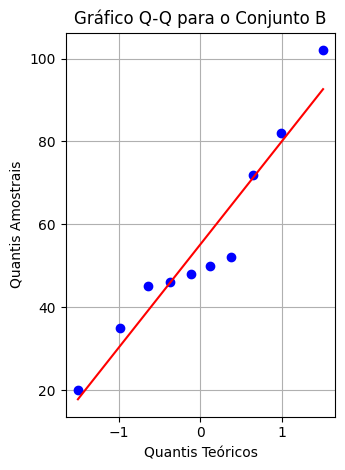


Teste de Shapiro-Wilk para Conjunto B: Estatística=0.9337, P-valor=0.4849
Para o Conjunto B, o p-valor do teste de Shapiro-Wilk é maior que 0.05, sugerindo que os dados podem ser considerados **normais**.

**Interpretação do Gráfico Q-Q:** Se os pontos no gráfico Q-Q se alinham aproximadamente ao longo da linha reta, isso sugere que a distribuição dos dados é próxima da distribuição normal. Desvios significativos da linha reta indicam não-normalidade.


In [ ]:
# Gráfico Q-Q para o conjunto B
plt.subplot(1, 2, 2)
stats.probplot(data_B, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para o Conjunto B')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Amostrais')
plt.grid(True)
plt.tight_layout()
plt.show()

# Verificação visual da normalidade para B
if np.std(data_B) > 0 and len(data_B) > 1: # Checar se há variância para evitar erro
    shapiro_B = stats.shapiro(data_B)
    print(f"\nTeste de Shapiro-Wilk para Conjunto B: Estatística={shapiro_B.statistic:.4f}, P-valor={shapiro_B.pvalue:.4f}")
    if shapiro_B.pvalue > 0.05:
        print("Para o Conjunto B, o p-valor do teste de Shapiro-Wilk é maior que 0.05, sugerindo que os dados podem ser considerados **normais**.")
    else:
        print("Para o Conjunto B, o p-valor do teste de Shapiro-Wilk é menor que 0.05, sugerindo que os dados **não são normais**.")
else:
    print("Dados insuficientes ou sem variância para verificar a normalidade do Conjunto B.")

print("\n**Interpretação do Gráfico Q-Q:** Se os pontos no gráfico Q-Q se alinham aproximadamente ao longo da linha reta, isso sugere que a distribuição dos dados é próxima da distribuição normal. Desvios significativos da linha reta indicam não-normalidade.")

ValueError: mount failed